<a href="https://colab.research.google.com/github/hiteshpujari/Machine-Learning-/blob/master/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the dataset -- Years of Experience V/S Salary
# importing Libraries

In [ ]:
import numpy as np      # for working with arrays
import pandas as pd     # for dealing with DataFrames
import matplotlib.pyplot as plt     # for Data Visualisation


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [5]:
df_train = pd.read_csv('Salary_Data.csv')
df_train.head(10) # prints the first 10 Rows from the dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
# Printing the Shape of Dataset
print(df_train.shape)

(30, 2)


In [7]:
# Information about the Training DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


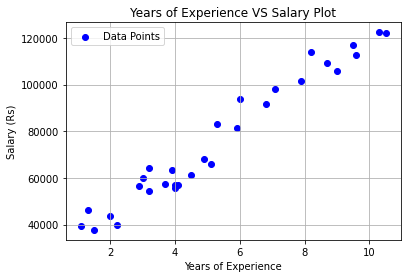

In [17]:
# Since there are no null values, we can proceed further
# Visualising the data
plt.scatter(df_train['YearsExperience'],df_train['Salary'],color='b')   # creates a Scatter Plot
plt.xlabel("Years of Experience")
plt.ylabel("Salary (Rs)")
plt.title("Years of Experience VS Salary Plot")
plt.grid()
plt.legend(["Data Points"])
plt.show()

In [19]:
years = np.array(df_train['YearsExperience'])  # independent variable ... called  Feature
salary = np.array(df_train['Salary'])  # dependent variable ... called  Label

In [20]:
# sampling the data
from sklearn.model_selection import train_test_split

# This splits the dataset into training (70% of dataset)and testing data (30% of dataset).

x_train, x_test, y_train, y_test = train_test_split(years, salary, test_size=0.3, random_state=0, shuffle=True)

print("shape of train dataset ",x_train.shape)
print("shape of test dataset ",x_test.shape)

print("\ndata-type of x_train :",type(x_train))

shape of train dataset  (21,)
shape of test dataset  (9,)

data-type of x_train : <class 'numpy.ndarray'>


In [21]:
from sklearn.linear_model import LinearRegression
# Create an object of Linear Regression module
reg = LinearRegression()

In [22]:
# Fitting our Training Dataset into the Linear Regression model

#####  reg.fit(x_train, y_train)  # --->> ERROR

# However, we get error as x_train, y_train are 1-Dimensional arrays.
# But, reg.fit() expects  2-Dimensional arrays.

# Therefore, we reshape x_train, y_train.
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [23]:
# Fitting our Training Dataset into the Linear Regression model
reg.fit(x_train, y_train)

# predicting the y_train for the model
predicted_y = reg.predict(x_train)

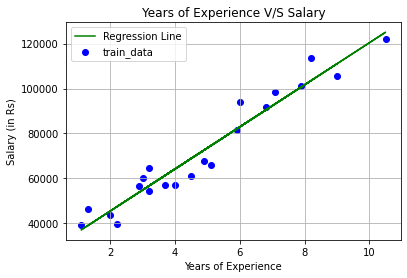

In [24]:
# Visualising the Regression Line and train_data
plt.plot(x_train, predicted_y, color='g')
plt.scatter(x_train, y_train, color='b')
plt.xlabel('Years of Experience')
plt.ylabel("Salary (in Rs)")
plt.legend(["Regression Line","train_data"])
plt.title("Years of Experience V/S Salary")
plt.grid()
plt.show()

In [25]:
# We can get SLOPE (m) of the Regression Line using reg.coef_
print("m = ", reg.coef_)

# We can get Y-INTERCEPT of the Regression Line using reg.intercept_
print("c = ",reg.intercept_)

m =  [[9360.26128619]]
c =  [26777.3913412]


In [26]:
# Checking the Accuracy of the model using reg.score().
# It returns the coefficient of determination R^2 of the prediction.

print("Accuracy of Train dataset = ",reg.score(x_train,y_train))

# The best possible score is 1.0 

Accuracy of Train dataset =  0.9423777652193379


In [30]:
# Testing the Linear Regression model on test dataset
df_test = pd.read_csv('Salary_Data.csv')

# Checking the shape of the testing dataset
print("shape of df_test : ",df_test.shape)

# Checking the dataset for any Null values
df_test.info()

# Counting the total number of Null values in each Column
df_test.isnull().sum()

x_test = np.array(df_test['YearsExperience'])

x_test = x_test.reshape(-1,1)

shape of df_test :  (30, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [31]:
# Predicting the Salary for x_test i.e. testing dataset
y_pred_test = reg.predict(x_test)

# and copying the predicted values into the "salary" column
df_test["salary"] = y_pred_test


# Print the final DataFrame after predicting the "salary"
print(df_test)

    YearsExperience    Salary         salary
0               1.1   39343.0   37073.678756
1               1.3   46205.0   38945.731013
2               1.5   37731.0   40817.783270
3               2.0   43525.0   45497.913914
4               2.2   39891.0   47369.966171
5               2.9   56642.0   53922.149071
6               3.0   60150.0   54858.175200
7               3.2   54445.0   56730.227457
8               3.2   64445.0   56730.227457
9               3.7   57189.0   61410.358100
10              3.9   63218.0   63282.410357
11              4.0   55794.0   64218.436486
12              4.0   56957.0   64218.436486
13              4.1   57081.0   65154.462615
14              4.5   61111.0   68898.567129
15              4.9   67938.0   72642.671644
16              5.1   66029.0   74514.723901
17              5.3   83088.0   76386.776158
18              5.9   81363.0   82002.932930
19              6.0   93940.0   82938.959058
20              6.8   91738.0   90427.168087
21        

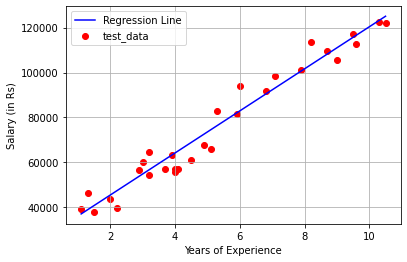

In [33]:
# Visualising the data
plt.plot(x_test, y_pred_test, color='b')
plt.scatter(df_test['YearsExperience'], df_test['Salary'], color='r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in Rs)")
plt.legend(["Regression Line", "test_data"])
plt.grid()
plt.show()